In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, utils, backend as K
import shap

In [64]:
sinais_vitais_sem_label = pd.read_csv('treino_sinais_vitais_sem_label.txt', 
                                      header=None, 
                                      index_col=0, 
                                      names=['pSist','pDiast','qPA','pulso','resp','gravid','classe'])

In [65]:
sinais_vitais_sem_label

,pDiast,qPA,pulso,resp,gravid,classe
pSist,,,,,,
1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000
2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530426
3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730748
4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679910
5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375881
...,...,...,...,...,...,...
1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467
1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385014
1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530703


Text(0, 0.5, 'gravidade')

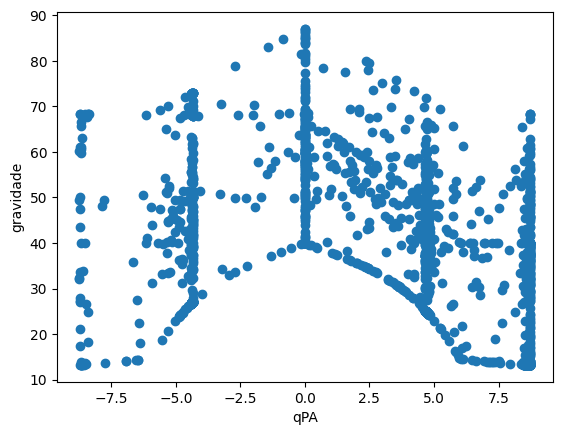

In [58]:
plot_sem_label = plt.scatter(sinais_vitais_sem_label['qPA'],sinais_vitais_sem_label['gravid'])
plt.xlabel('qPA')
plt.ylabel('gravidade')

Text(0, 0.5, 'gravidade')

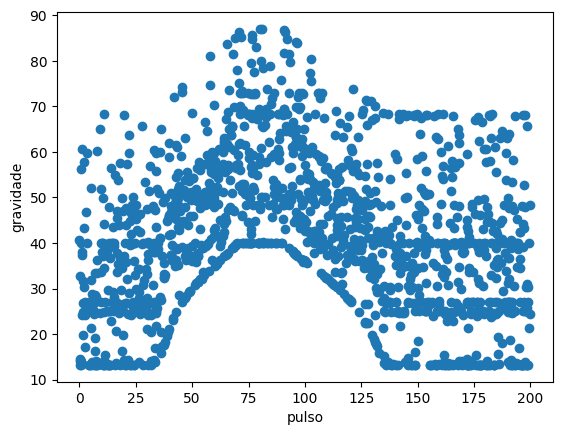

In [59]:
plot_sem_label = plt.scatter(sinais_vitais_sem_label['pulso'],sinais_vitais_sem_label['gravid'])
plt.xlabel('pulso')
plt.ylabel('gravidade')

Text(0, 0.5, 'gravidade')

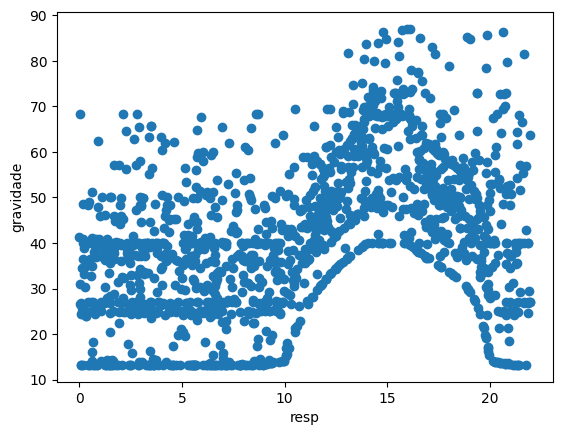

In [60]:
plot_sem_label = plt.scatter(sinais_vitais_sem_label['resp'],sinais_vitais_sem_label['gravid'])
plt.xlabel('resp')
plt.ylabel('gravidade')

In [28]:
sinais_vitais_com_label = pd.read_csv('treino_sinais_vitais_com_label.txt',
                                      header=None,
                                      index_col=0,
                                      names=['','pSist','pDiast','qPA','pulso','resp','gravid','classe'])

In [29]:
sinais_vitais_com_label

,pSist,pDiast,qPA,pulso,resp,gravid,classe
,,,,,,,
1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...
1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1


Text(0, 0.5, 'gravidade')

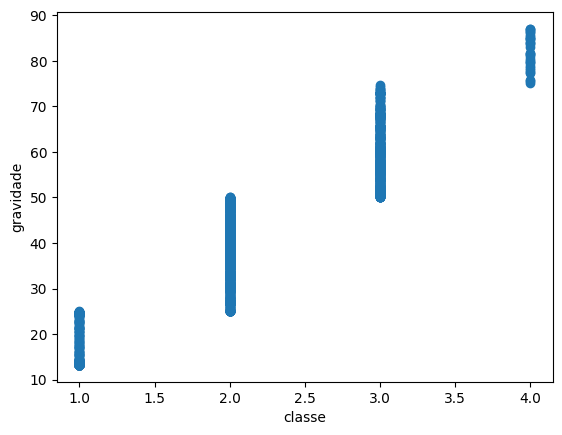

In [57]:
plot_com_label = plt.scatter(sinais_vitais_com_label['classe'],sinais_vitais_com_label['gravid'])
plt.xlabel('classe')
plt.ylabel('gravidade')